In [14]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F

from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

import sys
import os

# Add particle_detection to sys.path
sys.path.append(os.path.abspath(".."))
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

from particle_detection.data.data_pipeline import create_dataloaders

In [15]:
z1 = torch.load('../saved_models/z1_tensor.pt')
z2 = torch.load('../saved_models/z2_tensor.pt')
labels = torch.load('../saved_models/labels_tensor.pt')

In [16]:
print(f"z1 shape: {z1.shape}")  # Expected: (N, latent_dim)
print(f"z2 shape: {z2.shape}")  # Expected: (N, latent_dim)
print(f"labels shape: {labels.shape}")  # Expected: (N,)

z1 shape: torch.Size([41740, 128])
z2 shape: torch.Size([41740, 128])
labels shape: torch.Size([41740])


In [17]:
print(labels)

tensor([1., 1., 1.,  ..., 1., 1., 1.])


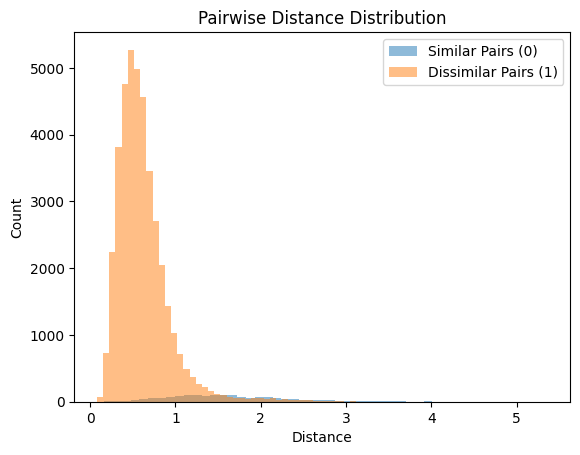

In [18]:
distances = F.pairwise_distance(z1, z2).cpu().numpy()

plt.hist(distances[labels == 0], bins=50, alpha=0.5, label="Similar Pairs (0)")
plt.hist(distances[labels == 1], bins=50, alpha=0.5, label="Dissimilar Pairs (1)")
plt.legend()
plt.xlabel("Distance")
plt.ylabel("Count")
plt.title("Pairwise Distance Distribution")
plt.show()

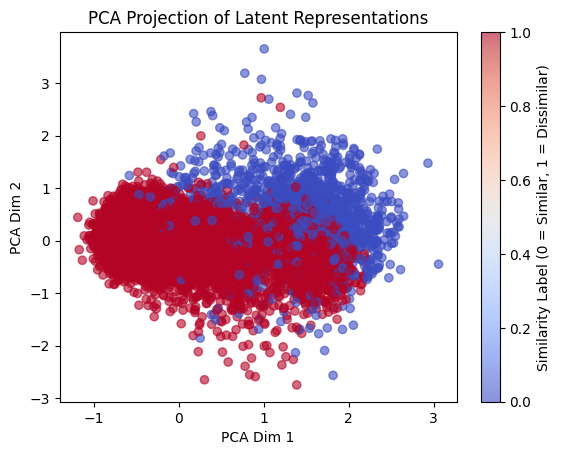

In [19]:
z_all = torch.cat([z1, z2], dim=0).cpu().numpy()
pca = PCA(n_components=2)
z_pca = pca.fit_transform(z_all)

plt.scatter(z_pca[: len(z1), 0], z_pca[: len(z1), 1], c=labels.cpu().numpy(), cmap="coolwarm", alpha=0.6)
plt.colorbar(label="Similarity Label (0 = Similar, 1 = Dissimilar)")
plt.xlabel("PCA Dim 1")
plt.ylabel("PCA Dim 2")
plt.title("PCA Projection of Latent Representations")
plt.show()

In [7]:
nbrs = NearestNeighbors(n_neighbors=5, metric="euclidean").fit(z1.cpu().numpy())
distances, indices = nbrs.kneighbors(z1.cpu().numpy())

print("Nearest Neighbors for first 5 samples:")
for i in range(5):
    print(f"Sample {i} Neighbors: {indices[i]}")
    print(f"Distances: {distances[i]}")

Nearest Neighbors for first 5 samples:
Sample 0 Neighbors: [    0 18870 20914  2550 18615]
Distances: [0.         0.1552441  0.26693293 0.27344352 0.2775414 ]
Sample 1 Neighbors: [   1    2    7 2551    9]
Distances: [0.         0.17048764 0.20392637 0.21656297 0.22406794]
Sample 2 Neighbors: [    2 17087     1     9    25]
Distances: [1.26440540e-07 1.56528443e-01 1.70487642e-01 1.80159539e-01
 1.91915274e-01]
Sample 3 Neighbors: [    3    19 20402  1022     8]
Distances: [0.         0.25395346 0.28979    0.29194841 0.29880318]
Sample 4 Neighbors: [    4 16597 16328    21 16329]
Distances: [4.21468478e-08 2.66178519e-01 2.86329031e-01 3.17698956e-01
 3.26675743e-01]
